In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv(r'E:\sohail classes\PUB G EDA\train_V2.csv')
test = pd.read_csv(r'E:\sohail classes\PUB G EDA\test_V2.csv')

In [5]:
len(set(train['Id']))

4446966

In [6]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [7]:
column=train.columns

In [9]:
train.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [10]:
# We have 1 Nan in our target variable
train[train['winPlacePerc'].isna() == True]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [7]:
# Lets have a look at all the players in this match
matchId = '224a123c53e008'
data = train[train['matchId'] == matchId]
data

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [11]:
# Remove the data where the target variable is NULL; include a sanity check
print ('length of the training set before: ',len(train))
train = train[train['winPlacePerc'].isna() != True]
print ('length of the training set after: ',len(train))

length of the training set before:  4446966
length of the training set after:  4446965


In [12]:
# Summary statistics for the number of kills
print('The average person kills {:.4f} players'.format(train['kills'].mean()))
print('50% of people have ',train['kills'].quantile(0.50),' kills or less')
print('75% of people have ',train['kills'].quantile(0.75),' kills or less')
print('99% of people have ',train['kills'].quantile(0.99),' kills or less')
print('while the most kills recorded in the data is', train['kills'].max())

The average person kills 0.9248 players
50% of people have  0.0  kills or less
75% of people have  1.0  kills or less
99% of people have  7.0  kills or less
while the most kills recorded in the data is 72


In [13]:
# There is one player whoes max kill is 72
# 50% players are unable to kill anyone
#75% players are able to kill only 1 enemy


In [34]:
train[train['kills']==4].T

,13,24,27,28,38,56,67,71,169,182,...,4446528,4446634,4446663,4446676,4446742,4446761,4446788,4446868,4446948,4446960
Id,b7807186e3f679,736eda9b9c20b3,dbf611495bfda3,f9473c4f1cfdc4,5cb863f7ac0dcd,ccd2eb49c09d77,22252be49d4419,83d0b9e08b6e72,d681a6f6817353,1fecfeb9bec37c,...,9bd971f692c504,5449eb51ffa336,931b83567ab56a,14a761c5736f40,4a63b59f631677,40e957c4bea6c7,0702eafaf704cf,342e51df89bf10,445aaa1ddc858e,69fa4c2d5431b1
groupId,3c08e461874749,d35e80e4e64dd4,10cbb86844dee0,8483976f3ba230,667d7cda387b5c,aec70dc7cd2994,37fa7583da2fa2,1246493aa7619b,8175d693ae0b47,0dcff9a13d53f7,...,8c5e2aaf8180a9,54430f82fff6c1,8cf872ff8190da,7c20ae69548425,4ddb0b860f952a,01738a1802e4ba,1885b633c79ad6,3cc8c5e0cfa213,b1efcbdb7ce674,2a3ad0e37fb6ce
matchId,2c30ddf481c52d,62fbe726028662,2cdae31ee18601,6057f846f3ed12,2d3bb641903718,a4861c84dd1d2b,1ce1cb998f75c7,55a60d2026f67e,93c9c5c2ba2111,fffe53015be300,...,c8ecf50afcfc9e,9ae2413dadbc1c,8aaf9f91e4d8d5,f36527209fcb3f,c5b5b41235bfef,b23ff50e099114,e79154123b3931,88724725568f96,05f6cd4077cd68,818ccf2160343f
assists,0,0,0,0,1,0,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
boosts,1,3,4,6,0,3,5,3,2,6,...,2,1,1,0,6,4,5,0,3,0
damageDealt,324.2,327.6,381.2,345.6,318,218.8,378.8,408,210.9,381.2,...,305.9,575.7,421.6,421.3,283.6,431.5,647.2,385,736.5,327.7
DBNOs,0,4,2,2,2,2,2,2,3,0,...,5,4,2,0,2,0,2,4,4,3
headshotKills,1,1,1,1,0,2,3,0,2,1,...,0,0,0,0,2,0,1,0,1,2
heals,5,1,2,1,0,3,6,0,2,2,...,2,0,4,0,6,2,4,1,2,0
killPlace,5,3,7,6,5,6,4,5,5,5,...,7,7,4,7,6,6,4,6,7,4


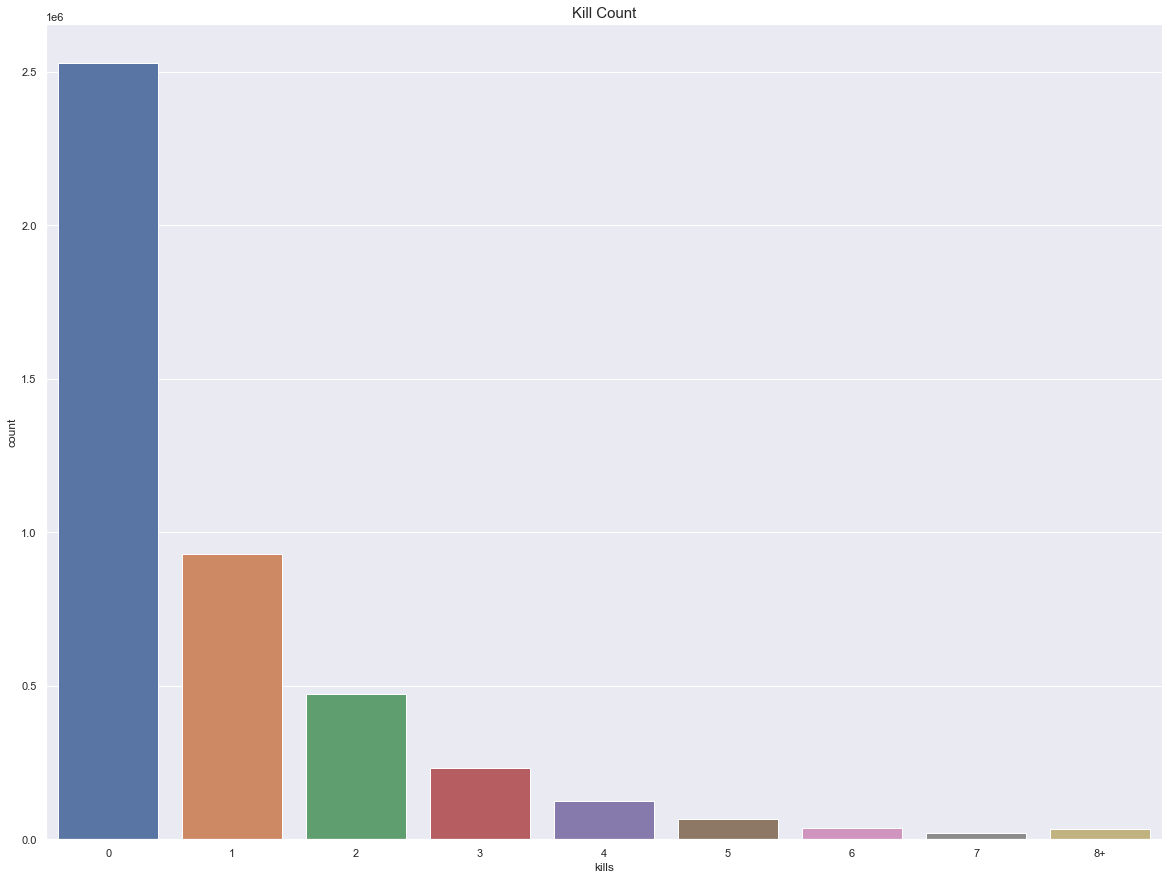

In [10]:
data = train.copy()
data.loc[data['kills'] > data['kills'].quantile(0.99)] = '8+'
plt.figure(figsize=(20,15))
sns.countplot(data['kills'].astype('str').sort_values())
plt.title('Kill Count',fontsize=15)
plt.show()

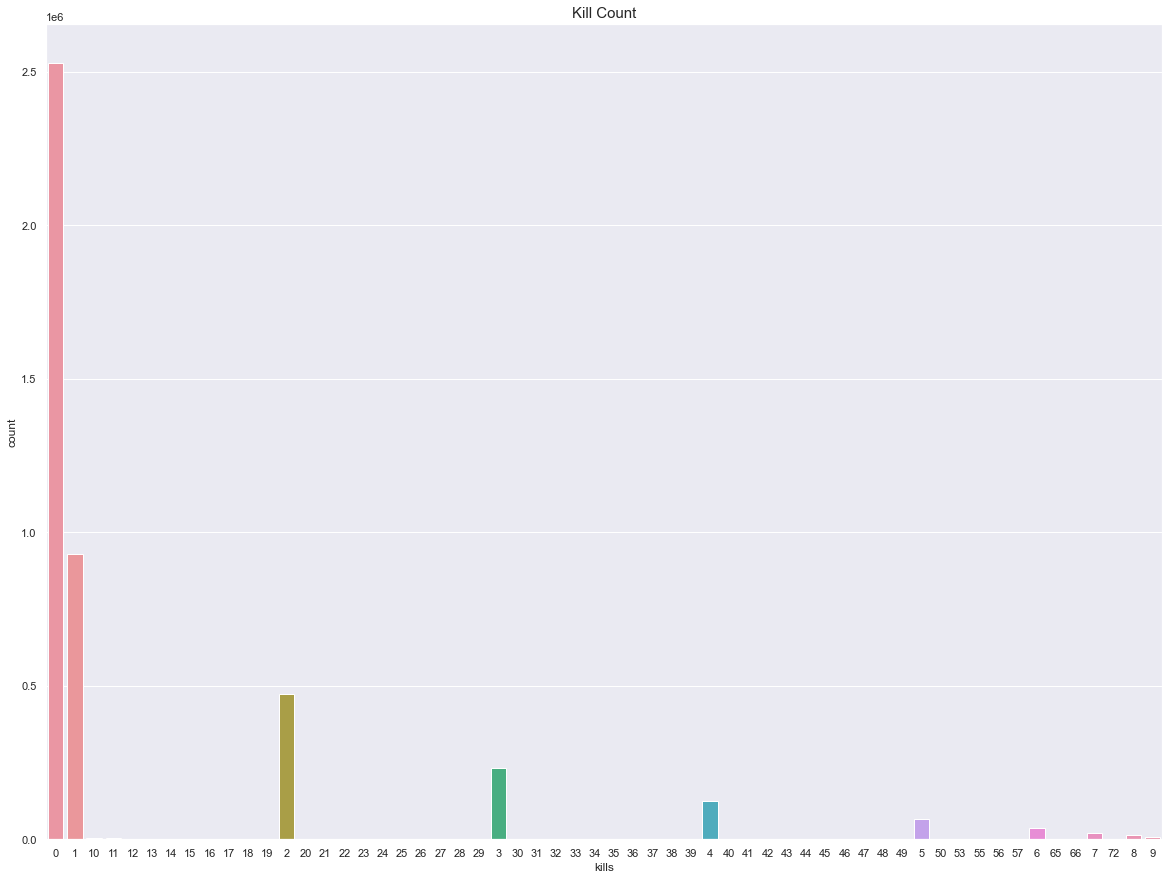

In [35]:
dat = train.copy()
#dat.loc[dat['kills'] > dat['kills'].quantile(0.99)] = '8+'
plt.figure(figsize=(20,15))
sns.countplot(dat['kills'].astype('str').sort_values())
plt.title('Kill Count',fontsize=15)
plt.show()

In [11]:
# Summary statistics for the number of kills
print('The average person kills {:.4f} players in a short time'.format(train['killStreaks'].mean()))
print('50% of people have ',train['killStreaks'].quantile(0.50),' kills or less in a short time')
print('75% of people have ',train['killStreaks'].quantile(0.75),' kills or less in a short time')
print('99% of people have ',train['killStreaks'].quantile(0.99),' kills or less in a short time')
print('While the most kills in a row recorded in the data is', train['killStreaks'].max())

The average person kills 0.5440 players in a short time
50% of people have  0.0  kills or less in a short time
75% of people have  1.0  kills or less in a short time
99% of people have  3.0  kills or less in a short time
While the most kills in a row recorded in the data is 20


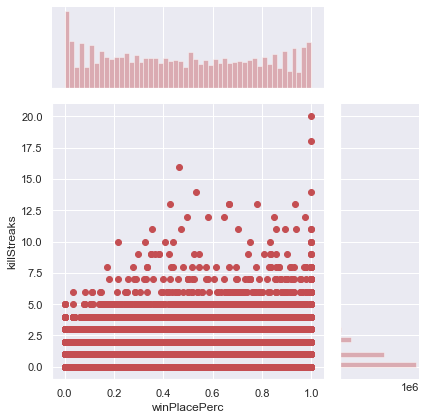

In [13]:
sns.jointplot(x='winPlacePerc', y='killStreaks', data=train, ratio=3, color='r')
plt.show()

In [14]:
# Summary statistics for the number of kills
print('The average person kills {:.4f} players from a vehicle'.format(train['roadKills'].mean()))
print('50% of people have ',train['roadKills'].quantile(0.50),' kills or less from a vehicle')
print('75% of people have ',train['roadKills'].quantile(0.75),' kills or less from a vehicle')
print('99% of people have ',train['roadKills'].quantile(0.99),' kills or less from a vehicle')
print('While the most kills recorded from a vehicle in the data is', train['roadKills'].max())

The average person kills 0.0035 players from a vehicle
50% of people have  0.0  kills or less from a vehicle
75% of people have  0.0  kills or less from a vehicle
99% of people have  0.0  kills or less from a vehicle
While the most kills recorded from a vehicle in the data is 18


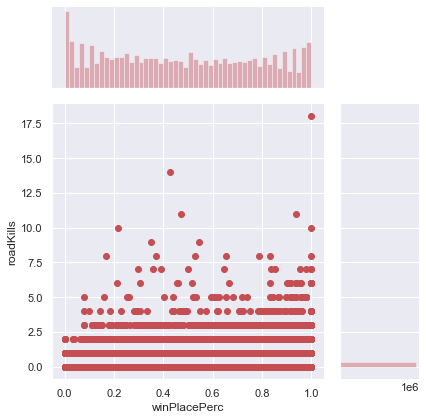

In [12]:
sns.jointplot(x='winPlacePerc', y='roadKills', data=train, ratio=3, color='r')
plt.show()

In [13]:
print('The average person kills {:.4f} players on their own team'.format(train['teamKills'].mean()))
print('50% of people have killed ',train['teamKills'].quantile(0.50),' team players')
print('75% of people have killed ',train['teamKills'].quantile(0.75),' team players')
print('99% of people have killed ',train['teamKills'].quantile(0.99),' team players')
print('while the most kills recorded in the data is', train['teamKills'].max())

The average person kills 0.0239 players on their own team
50% of people have killed  0.0  team players
75% of people have killed  0.0  team players
99% of people have killed  1.0  team players
while the most kills recorded in the data is 12


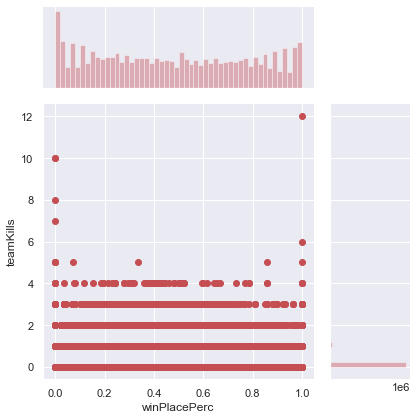

In [14]:
sns.jointplot(x='winPlacePerc', y='teamKills', data=train, ratio=3, color='r')
plt.show()

In [15]:
# Summary statistics for the number of kills
print('The average person make {:.4f} head shots'.format(train['headshotKills'].mean()))
print('75% of people make {:.2f} head shots ',format(train['headshotKills'].quantile(0.75)))
print('99% of people make {:.2f} head shots ',format(train['headshotKills'].quantile(0.99)))
print('while the most head shots recorded in the data is', train['headshotKills'].max())

The average person make 0.2268 head shots
75% of people make {:.2f} head shots  0.0
99% of people make {:.2f} head shots  3.0
while the most head shots recorded in the data is 64


In [16]:
train[train['headshotKills'] == train['headshotKills'].max()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
3431247,06308c988bf0c2,4c4ee1e9eb8b5e,6680c7c3d17d48,7,4,5990.0,0,64,10,1,...,0,0.0,0,0.0,0,0,728.1,35,0,1.0


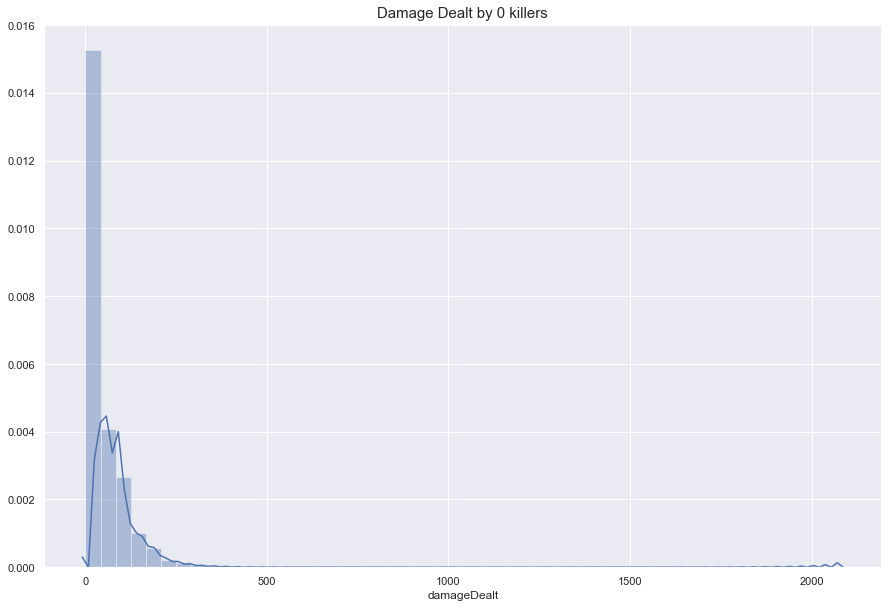

In [17]:
data = train.copy()

# Keep only those players that didn't kill anyone
data = data[data['kills']==0]
plt.figure(figsize=(15,10))
plt.title('Damage Dealt by 0 killers',fontsize=15)
sns.distplot(data['damageDealt'])
plt.show()

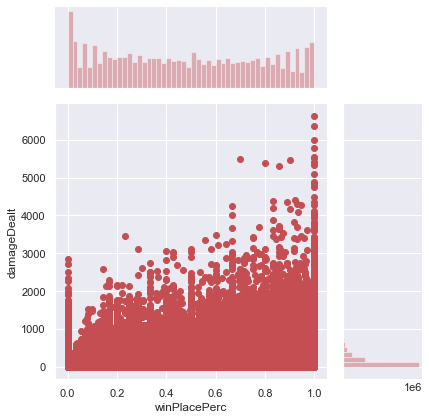

In [18]:
sns.jointplot(x='winPlacePerc', y='damageDealt', data=train, ratio=3, color='r')
plt.show()

In [19]:
# Summary statistics for the distance walked.
print('The average person walks/runs {:.2f} m'.format(train['walkDistance'].mean()))
print('25% of people have walked/ran {:.2f} m or less'.format(train['walkDistance'].quantile(0.25)))
print('50% of people have walked/ran {:.2f} m or less'.format(train['walkDistance'].quantile(0.50)))
print('75% of people have walked/ran {:.2f} m or less'.format(train['walkDistance'].quantile(0.75)))
print('99% of people have walked/ran {:.2f} m or less'.format(train['walkDistance'].quantile(0.99)))
print('The longest distance travelled by feet in the data is {:.2f} m'.format(train['walkDistance'].max()))

The average person walks/runs 1154.22 m
25% of people have walked/ran 155.10 m or less
50% of people have walked/ran 685.60 m or less
75% of people have walked/ran 1976.00 m or less
99% of people have walked/ran 4396.00 m or less
The longest distance travelled by feet in the data is 25780.00 m


In [4]:
# Drivers

print("The average person drives for {:.1f}m, 99% of people have drived {}m or less, while the formula 1 champion drived for {}m.".format(train['rideDistance'].mean(), train['rideDistance'].quantile(0.99), train['rideDistance'].max()))

The average person drives for 606.1m, 99% of people have drived 6966.0m or less, while the formula 1 champion drived for 40710.0m.


In [15]:
train[train['rideDistance']==train['rideDistance'].max()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4099938,afe34618b04d77,c14f532b283844,732c3b752e055f,0,0,0.0,0,0,0,42,...,0,40710.0,0,0.0,0,0,560.1,0,0,0.8478


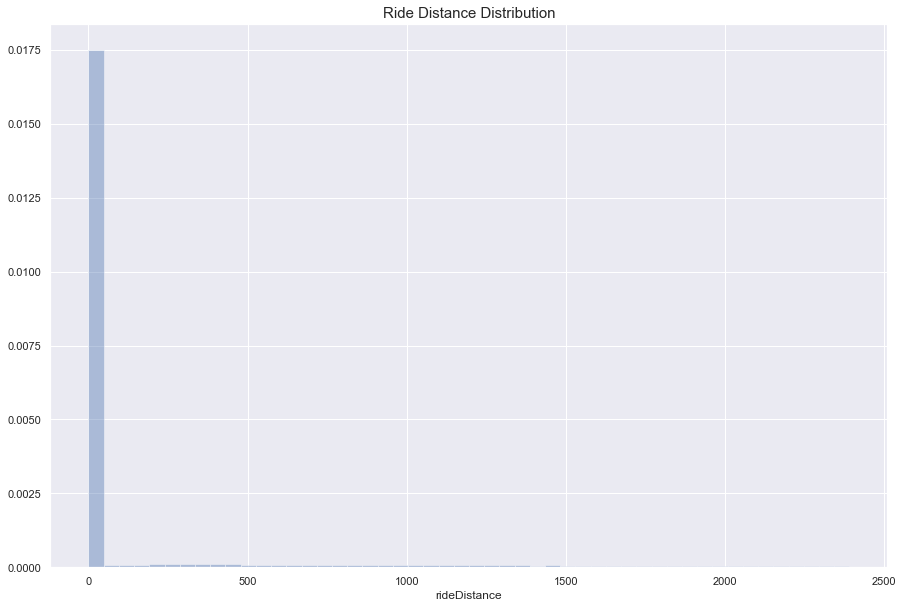

In [16]:
data = train.copy()

data = data[data['rideDistance'] < train['rideDistance'].quantile(0.9)]
plt.figure(figsize=(15,10))
plt.title("Ride Distance Distribution",fontsize=15)
sns.distplot(data['rideDistance'])
plt.show()

In [18]:
print("{} players ({:.4f}%) drived for 0 meters. This means that they don't have a driving licence yet.".format(len(data[data['rideDistance'] == 0]), 100*len(data[data['rideDistance']==0])/len(train)))

3309428 players (74.4199%) drived for 0 meters. This means that they don't have a driving licence yet.


In [ ]:
sns.jointplot(x="winPlacePerc", y="rideDistance", data=train, height=10, ratio=3, color="y")
plt.show()

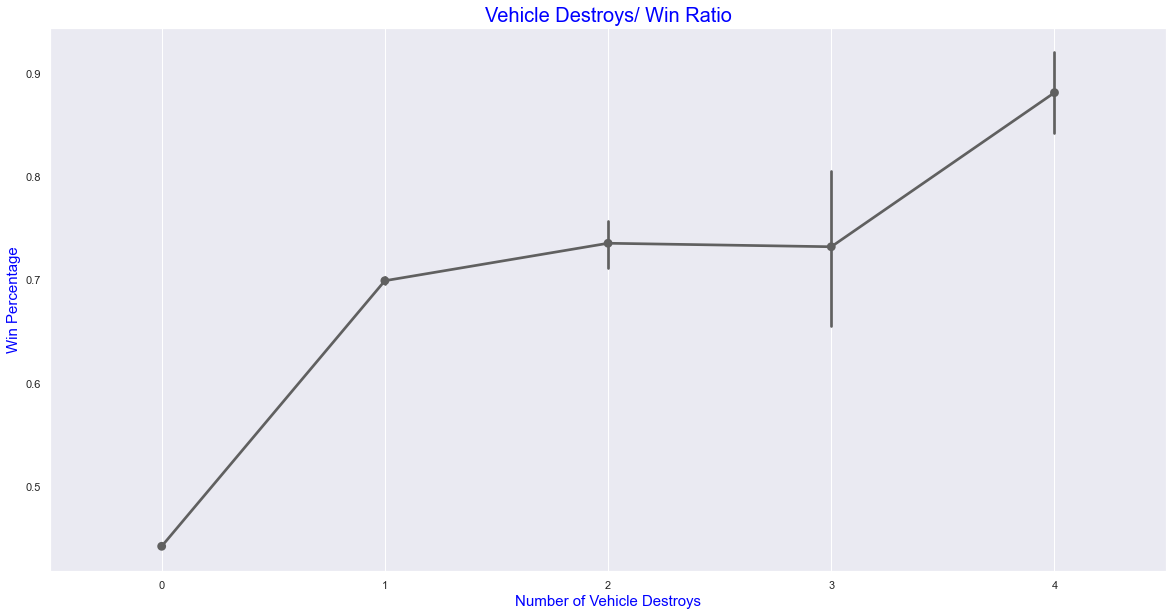

In [19]:
# Vehicle Destroys
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='vehicleDestroys',y='winPlacePerc',data=data,color='#606060',alpha=0.8)
plt.xlabel('Number of Vehicle Destroys',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Vehicle Destroys/ Win Ratio',fontsize = 20,color='blue')
plt.grid()
plt.show()

In [20]:
# Swimmers
print("The average person swims for {:.1f}m, 99% of people have swimemd {}m or less, while the olympic champion swimmed for {}m.".format(train['swimDistance'].mean(), train['swimDistance'].quantile(0.99), train['swimDistance'].max()))

The average person swims for 4.5m, 99% of people have swimemd 123.0m or less, while the olympic champion swimmed for 3823.0m.


In [ ]:
data = train.copy()
data = data[data['swimDistance'] < train['swimDistance'].quantile(0.95)]
plt.figure(figsize=(15,10))
plt.title("Swim Distance Distribution",fontsize=15)
sns.distplot(data['swimDistance'])
plt.show()

In [ ]:
swim = train.copy()

swim['swimDistance'] = pd.cut(swim['swimDistance'], [-1, 0, 5, 20, 5286], labels=['0m','1-5m', '6-20m', '20m+'])

plt.figure(figsize=(15,8))
sns.boxplot(x="swimDistance", y="winPlacePerc", data=swim)
plt.show()

In [ ]:
# The Healers

In [ ]:
print("The average person uses {:.1f} heal items, 99% of people use {} or less, while the doctor used {}.".format(train['heals'].mean(), train['heals'].quantile(0.99), train['heals'].max()))
print("The average person uses {:.1f} boost items, 99% of people use {} or less, while the doctor used {}.".format(train['boosts'].mean(), train['boosts'].quantile(0.99), train['boosts'].max()))

In [ ]:
data = train.copy()
data = data[data['heals'] < data['heals'].quantile(0.99)]
data = data[data['boosts'] < data['boosts'].quantile(0.99)]

f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='heals',y='winPlacePerc',data=data,color='lime',alpha=0.8)
sns.pointplot(x='boosts',y='winPlacePerc',data=data,color='blue',alpha=0.8)
plt.text(4,0.6,'Heals',color='lime',fontsize = 17,style = 'italic')
plt.text(4,0.55,'Boosts',color='blue',fontsize = 17,style = 'italic')
plt.xlabel('Number of heal/boost items',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Heals vs Boosts',fontsize = 20,color='blue')
plt.grid()
plt.show()

In [ ]:
sns.jointplot(x="winPlacePerc", y="heals", data=train, height=10, ratio=3, color="lime")
plt.show()

In [ ]:
sns.jointplot(x="winPlacePerc", y="boosts", data=train, height=10, ratio=3, color="blue")
plt.show()

In [ ]:
# solo duo vs squad

In [ ]:
solos = train[train['numGroups']>50]
duos = train[(train['numGroups']>25) & (train['numGroups']<=50)]
squads = train[train['numGroups']<=25]
print("There are {} ({:.2f}%) solo games, {} ({:.2f}%) duo games and {} ({:.2f}%) squad games.".format(len(solos), 100*len(solos)/len(train), len(duos), 100*len(duos)/len(train), len(squads), 100*len(squads)/len(train),))

In [ ]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='kills',y='winPlacePerc',data=solos,color='black',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=duos,color='#CC0000',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=squads,color='#3399FF',alpha=0.8)
plt.text(37,0.6,'Solos',color='black',fontsize = 17,style = 'italic')
plt.text(37,0.55,'Duos',color='#CC0000',fontsize = 17,style = 'italic')
plt.text(37,0.5,'Squads',color='#3399FF',fontsize = 17,style = 'italic')
plt.xlabel('Number of kills',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Solo vs Duo vs Squad Kills',fontsize = 20,color='blue')
plt.grid()
plt.show()

In [ ]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='DBNOs',y='winPlacePerc',data=duos,color='#CC0000',alpha=0.8)
sns.pointplot(x='DBNOs',y='winPlacePerc',data=squads,color='#3399FF',alpha=0.8)
sns.pointplot(x='assists',y='winPlacePerc',data=duos,color='#FF6666',alpha=0.8)
sns.pointplot(x='assists',y='winPlacePerc',data=squads,color='#CCE5FF',alpha=0.8)
sns.pointplot(x='revives',y='winPlacePerc',data=duos,color='#660000',alpha=0.8)
sns.pointplot(x='revives',y='winPlacePerc',data=squads,color='#000066',alpha=0.8)
plt.text(14,0.5,'Duos - Assists',color='#FF6666',fontsize = 17,style = 'italic')
plt.text(14,0.45,'Duos - DBNOs',color='#CC0000',fontsize = 17,style = 'italic')
plt.text(14,0.4,'Duos - Revives',color='#660000',fontsize = 17,style = 'italic')
plt.text(14,0.35,'Squads - Assists',color='#CCE5FF',fontsize = 17,style = 'italic')
plt.text(14,0.3,'Squads - DBNOs',color='#3399FF',fontsize = 17,style = 'italic')
plt.text(14,0.25,'Squads - Revives',color='#000066',fontsize = 17,style = 'italic')
plt.xlabel('Number of DBNOs/Assits/Revives',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Duo vs Squad DBNOs, Assists, and Revives',fontsize = 20,color='blue')
plt.grid()
plt.show()

In [ ]:
# Pearson Correlation

In [ ]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [ ]:
k = 5 #number of variables for heatmap
f,ax = plt.subplots(figsize=(11, 11))
cols = train.corr().nlargest(k, 'winPlacePerc')['winPlacePerc'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
sns.set()
cols = ['winPlacePerc', 'walkDistance', 'boosts', 'weaponsAcquired', 'damageDealt', 'killPlace']
sns.pairplot(train[cols], size = 2.5)
plt.show()